In [1]:
from UTILITY_quickstart import *

#importedDefaultSettings = loadConfig("setLattice_configs/2024-10-22_oneBunch_baseline.yml")
importedDefaultSettings = loadConfig("setLattice_configs/2024-10-22_oneBunch_baseline2.yml")

#New DL10 centering
#importedDefaultSettings = importedDefaultSettings | {"centerDL10" : True}

In [2]:
#Disable centering
#importedDefaultSettings = importedDefaultSettings | {"centerBC14" : False, "centerBC20" : False, "centerMFFF" : False}
    

In [3]:
csrTF = False
evalElement = "BEGBC20"


inputBeamFilePathSuffix = importedDefaultSettings["inputBeamFilePathSuffix"]
bunchCount = importedDefaultSettings["bunchCount"]
tao = initializeTao(
    inputBeamFilePathSuffix = inputBeamFilePathSuffix,
    
    csrTF = csrTF,
    numMacroParticles=1e4,
    scratchPath = "/tmp",
    randomizeFileNames = True, 
    transverseWakes = True
)

Environment set to:  /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao
Transverse wakes enabled!
Tracking to end
CSR off
Overwriting lattice with setLattice() defaults
No defaults file provided to setLattice(). Using setLattice_configs/defaults.yml
Number of macro particles = 10000.0
Beam created, written to /tmp/beams/activeBeamFile_13103087150025696937.h5, and reinit to tao


In [4]:
trackBeam(tao, trackEnd = "L0BFEND", verbose = True)
PInit = getBeamAtElement(tao, "L0AFEND")

artificialFactor = 1.3
#artificialFactor = 1.0
PInit.x = artificialFactor * PInit.x
PInit.px = artificialFactor * PInit.px
PInit.y = artificialFactor * PInit.y
PInit.py = artificialFactor * PInit.py

makeBeamActiveBeamFile(PInit, tao = tao)

Loaded /tmp/beams/activeBeamFile_13103087150025696937.h5
Set track_start = L0AFEND, track_end = L0BFEND
Tracking!
trackBeam() exiting


In [5]:
setLattice(tao, **importedDefaultSettings)

In [6]:
trackBeam(tao, 
          trackEnd = evalElement,
          **importedDefaultSettings,
          verbose = True
         )

Loaded /tmp/beams/activeBeamFile_13103087150025696937.h5
Set track_start = L0AFEND, track_end = BEGBC20
Set track_end = BEGBC14_1
Tracking!
Also setting BC14 energy = 4.5 GeV, from 4.413397584988906 GeV
Beam centered at BEGBC14 written to /tmp/beams/patchBeamFile_13103087150025696937.h5
Loaded /tmp/beams/patchBeamFile_13103087150025696937.h5
Set track_start = BEGBC14_1, track_end = BEGBC20
Tracking!
trackBeam() exiting


In [7]:
PInit = getBeamAtElement(tao, "L0AFEND")
P571 = getBeamAtElement(tao, "PR10571")
P = getBeamAtElement(tao, evalElement)

In [8]:
getBeamAtElement(tao, "PR10571").twiss(plane = "x", fraction = 0.9)

{'alpha_x': -1.8404432013574172,
 'beta_x': 5.236157390029817,
 'gamma_x': 0.8378722888995809,
 'emit_x': 1.609711134769977e-08,
 'eta_x': 0.0026834620559259836,
 'etap_x': 0.001742026207239583,
 'norm_emit_x': 3.878730571237714e-06}

In [9]:
getBeamAtElement(tao, "BEGBC14_1").twiss(fraction = 0.9)

{'alpha_x': -0.6661436904589517,
 'beta_x': 75.16332795234486,
 'gamma_x': 0.01920813587782646,
 'emit_x': 9.723052455038962e-10,
 'eta_x': 0.0559252172401507,
 'etap_x': 0.0007897428024607482,
 'norm_emit_x': 8.558852260185886e-06}

In [10]:
getBeamAtElement(tao, "ENDBC14_2").twiss(fraction = 0.9)

{'alpha_x': 0.29690841931291756,
 'beta_x': 6.766329917411065,
 'gamma_x': 0.16081902933211473,
 'emit_x': 9.652251402447748e-10,
 'eta_x': 0.014063437428174149,
 'etap_x': -0.0021607784105144,
 'norm_emit_x': 8.496718602734463e-06}

In [11]:
getBeamAtElement(tao, "BEGBC20").twiss(plane = "x", fraction = 0.9)

{'alpha_x': 1.5634981209223424,
 'beta_x': 13.179893490301367,
 'gamma_x': 0.2613470569138062,
 'emit_x': 4.913722511197237e-10,
 'eta_x': -0.010676710507806692,
 'etap_x': 0.0030100054510861993,
 'norm_emit_x': 9.538273878392693e-06}

In [12]:
getBeamAtElement(tao, "BEGBC20").twiss(plane = "y", fraction = 0.9)

{'alpha_y': 1.5170519485545741,
 'beta_y': 36.04913720364205,
 'gamma_y': 0.09158184829676547,
 'emit_y': 1.9443639422198054e-10,
 'eta_y': 0.00013020327341679665,
 'etap_y': -5.4464464130871976e-06,
 'norm_emit_y': 3.7767504952757673e-06}

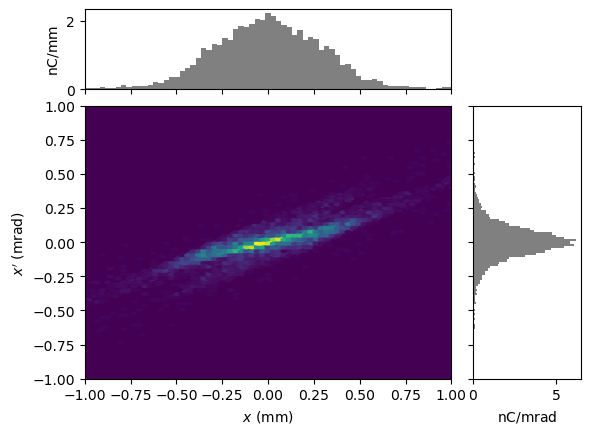

<Figure size 640x480 with 0 Axes>

In [13]:
display(plotMod(P571, 'x', 'xp',  bins=300, xlim = (-0.001, 0.001), ylim = (-0.001, 0.001)))
plt.clf()

In [14]:
getBeamSpecs(P571, targetTwiss = "PR10571")

{'PDrive_median_x': 3.9635385883664117e-07,
 'PDrive_median_y': -3.187200742724471e-07,
 'PDrive_median_xp': 1.832711083512847e-07,
 'PDrive_median_yp': -1.706216692801936e-07,
 'PDrive_median_energy': 123137324.39793934,
 'PDrive_sigmaSI90_x': 0.00037544785284659125,
 'PDrive_sigmaSI90_y': 0.0002602000421074464,
 'PDrive_sigmaSI90_z': 0.0005717454765937772,
 'PDrive_sigmaSI90_xp': 0.00017964467088464343,
 'PDrive_sigmaSI90_yp': 8.085507223387308e-05,
 'PDrive_sigmaSI90_energy': 105182.52560668257,
 'PDrive_emitSI90_x': 7.318882891346698e-06,
 'PDrive_emitSI90_y': 5.034718757196451e-06,
 'PDrive_norm_emit_x': 3.878730571237714e-06,
 'PDrive_norm_emit_y': 2.805723954696407e-06,
 'PDrive_charge_nC': 1.6000000000000012,
 'PDrive_BMAG_x': 1.007883500518607,
 'PDrive_BMAG_y': 1.008534164960233,
 'PDrive_sliced_BMAG_x': [2.1569168454267804,
  1.1294625022924356,
  1.0716530412531622,
  1.102617832532942,
  1.3462037703214813],
 'PDrive_sliced_BMAG_y': [1.248404409107075,
  1.0169011141105162

In [15]:
getBeamSpecs(P, targetTwiss = "BEGBC20")

{'PDrive_median_x': 2.8256089783140417e-05,
 'PDrive_median_y': 1.1771063513648122e-06,
 'PDrive_median_xp': -4.179400267017659e-06,
 'PDrive_median_yp': -4.201267128474888e-08,
 'PDrive_median_energy': 9921082284.727867,
 'PDrive_sigmaSI90_x': 0.0001664948448141154,
 'PDrive_sigmaSI90_y': 9.371633905028718e-05,
 'PDrive_sigmaSI90_z': 8.079169944808684e-05,
 'PDrive_sigmaSI90_xp': 3.0197478688506526e-05,
 'PDrive_sigmaSI90_yp': 5.49376386884421e-06,
 'PDrive_sigmaSI90_energy': 88357822.56771463,
 'PDrive_emitSI90_x': 4.694529425884905e-05,
 'PDrive_emitSI90_y': 6.197028522513354e-06,
 'PDrive_norm_emit_x': 9.538273878392693e-06,
 'PDrive_norm_emit_y': 3.7767504952757673e-06,
 'PDrive_charge_nC': 1.5987200000000008,
 'PDrive_BMAG_x': 1.2621247752413132,
 'PDrive_BMAG_y': 1.0406169748111218,
 'PDrive_sliced_BMAG_x': [2.1216988060782054,
  1.8369273972326687,
  1.2094192873610117,
  1.5468641131542937,
  4.963638666476804],
 'PDrive_sliced_BMAG_y': [1.5540497028799063,
  1.393091960509572

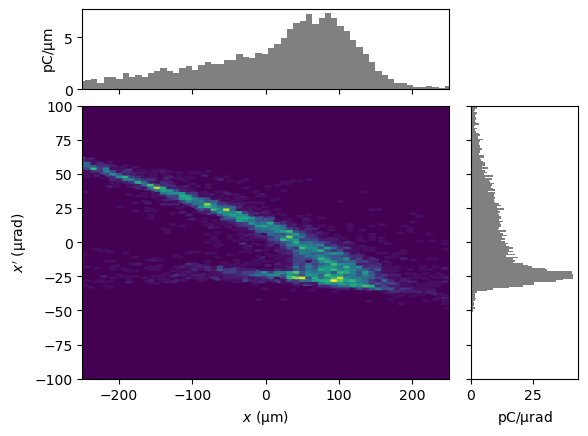

In [16]:
display(plotMod(P, 'x', 'xp',  bins=300, xlim = (-0.25e-3, 0.25e-3), ylim = (-0.1e-3, 0.1e-3)))
plt.clf()

In [17]:
PENDBC11 = getBeamAtElement(tao, "BEGL2F")

In [18]:
PENDBC11["mean_x"]

-0.001528176341009003

In [19]:
PENDBC11["mean_y"]

-3.58849134390211e-06

In [20]:
P571["mean_x"]

4.004432355246005e-06

In [21]:
tao.ele_head(57)

{'universe': 1,
 '1^ix_branch': 0,
 'ix_ele': 57,
 'key': 'VKicker',
 'name': 'YC10412',
 'type': 'class-1s',
 'alias': 'YCOR:IN10:412',
 'descrip': '',
 'is_on': True,
 's': 7.5598383,
 's_start': 7.5598383,
 'ref_time': 2.5233221070638e-08,
 'has#methods': True,
 'has#ab_multipoles': True,
 'has#kt_multipoles': False,
 'has#multipoles_elec': True,
 'has#ac_kick': False,
 'has#taylor': False,
 'has#spin_taylor': False,
 'has#wake': False,
 'num#cartesian_map': 0,
 'num#cylindrical_map': 0,
 'num#gen_grad_map': 0,
 'num#grid_field': 0,
 'has#wall3d': 0,
 'has#control': False,
 'has#twiss': True,
 'has#mat6': True,
 'has#floor': True,
 'has#photon': False,
 'has#lord_slave': True}

In [22]:
#elementTypes = { tao.ele_head(i)["name"] : tao.ele_head(i)["key"] for i in range(len(tao.lat_ele_list())) }
elementIndexToName = { i : tao.ele_head(i)["name"] for i in range(len(tao.lat_ele_list())) }
elementTypes = { i : tao.ele_head(i)["key"] for i in range(len(tao.lat_ele_list())) }

In [23]:
usefulMarkers = [k for k, v in elementTypes.items() if v == "Marker"][4:-45]

In [24]:
{ elementIndexToName[eleII] : round( 1e6 * getBeamAtElement(tao, eleII)["mean_x"] ) for eleII in usefulMarkers }

{'L0AFEND': -5,
 'L0AFWAKE': -5,
 'FLNGAF2': -5,
 'DLFDBF': -9,
 'L0BFMID': -5,
 'OUTCPBF': -2,
 'L0BFEND': -2,
 'L0BFWAKE': -2,
 'FLNGBF2': -2,
 'ENDINJ': -2,
 'BEGDL10': -2,
 'IM10431': -1,
 'LH10BEG': -2,
 'HTRUNDF': -1246,
 'LH10END': -2,
 'WS10561': 4,
 'MRK0F': 4,
 'IM10591': 5,
 'BX0FBEG': 3,
 'CNT0F': -712,
 'BX0FEND': -712,
 'IM10791': -1731,
 'ENDDL10': -1681,
 'BEGL1F': -1681,
 'L1XFEND': 974,
 'ENDL1F': 1050,
 'BEGBC11_1': 1050,
 'BC11CBEG': 1109,
 'CNT1B': 294,
 'BC11CEND': 294,
 'ENDBC11_1': 294,
 'BEGBC11_2': 294,
 'IM11360': 257,
 'ENDBC11_2': -1528,
 'BEGL2F': -1528,
 'LI11STRT': -1528,
 'WS11444': -108,
 'WS11614': 903,
 'WS11744': 1099,
 'LI11END': 531,
 'LI12BEG': 531,
 'WS12214': 283,
 'LI12END': -309,
 'LI13BEG': -309,
 'LI13END': -43,
 'LI14BEG': -43,
 'LI14TERM': 603,
 'ENDL2F': 603,
 'BEGBC14_1': 186,
 'ENDBC14_1': 249,
 'BEGBC14E': 249,
 'ENDBC14E': 57,
 'BEGBC14_2': 57,
 'CNT2B': 57,
 'IM14890': 46,
 'VV14940': 40,
 'ENDBC14_2': 38,
 'BEGL3F_1': 38,
 'LI15BEG

In [25]:
{ elementIndexToName[eleII] : 1e6 * getBeamAtElement(tao, eleII).twiss(plane = "x", fraction = 0.9)['norm_emit_x']  for eleII in usefulMarkers }

{'L0AFEND': 2.8261948693706898,
 'L0AFWAKE': 2.8261948693706898,
 'FLNGAF2': 2.8261948693706898,
 'DLFDBF': 3.393907718111402,
 'L0BFMID': 3.7402640399739604,
 'OUTCPBF': 3.879388560817632,
 'L0BFEND': 3.873754320740786,
 'L0BFWAKE': 3.873754320740786,
 'FLNGBF2': 3.873754320740786,
 'ENDINJ': 3.873754320740786,
 'BEGDL10': 3.873754320740786,
 'IM10431': 3.875108759117344,
 'LH10BEG': 3.875641511056409,
 'HTRUNDF': 7.159113603337552,
 'LH10END': 3.880032700168247,
 'WS10561': 3.8790995892011337,
 'MRK0F': 3.878915065947588,
 'IM10591': 3.878071615359935,
 'BX0FBEG': 3.8749006032207407,
 'CNT0F': 6.1934240829666685,
 'BX0FEND': 6.1934240829666685,
 'IM10791': 6.127078218861314,
 'ENDDL10': 6.125634251203851,
 'BEGL1F': 6.125634251203851,
 'L1XFEND': 5.7234040021019235,
 'ENDL1F': 5.7317161578099025,
 'BEGBC11_1': 5.7317161578099025,
 'BC11CBEG': 5.735510028826702,
 'CNT1B': 5.71754262416773,
 'BC11CEND': 5.71754262416773,
 'ENDBC11_1': 5.71754262416773,
 'BEGBC11_2': 5.71754262416773,
 

In [26]:
{ elementIndexToName[eleII] : round( 1e6 * getBeamAtElement(tao, eleII)["sigma_z"] ) for eleII in usefulMarkers }

{'L0AFEND': 572,
 'L0AFWAKE': 572,
 'FLNGAF2': 572,
 'DLFDBF': 573,
 'L0BFMID': 574,
 'OUTCPBF': 574,
 'L0BFEND': 574,
 'L0BFWAKE': 574,
 'FLNGBF2': 574,
 'ENDINJ': 574,
 'BEGDL10': 574,
 'IM10431': 574,
 'LH10BEG': 574,
 'HTRUNDF': 577,
 'LH10END': 580,
 'WS10561': 580,
 'MRK0F': 580,
 'IM10591': 580,
 'BX0FBEG': 580,
 'CNT0F': 562,
 'BX0FEND': 562,
 'IM10791': 562,
 'ENDDL10': 562,
 'BEGL1F': 562,
 'L1XFEND': 562,
 'ENDL1F': 562,
 'BEGBC11_1': 562,
 'BC11CBEG': 562,
 'CNT1B': 342,
 'BC11CEND': 342,
 'ENDBC11_1': 342,
 'BEGBC11_2': 342,
 'IM11360': 342,
 'ENDBC11_2': 342,
 'BEGL2F': 342,
 'LI11STRT': 342,
 'WS11444': 341,
 'WS11614': 341,
 'WS11744': 341,
 'LI11END': 341,
 'LI12BEG': 341,
 'WS12214': 341,
 'LI12END': 341,
 'LI13BEG': 341,
 'LI13END': 341,
 'LI14BEG': 341,
 'LI14TERM': 341,
 'ENDL2F': 341,
 'BEGBC14_1': 341,
 'ENDBC14_1': 341,
 'BEGBC14E': 341,
 'ENDBC14E': 82,
 'BEGBC14_2': 82,
 'CNT2B': 82,
 'IM14890': 82,
 'VV14940': 82,
 'ENDBC14_2': 82,
 'BEGL3F_1': 82,
 'LI15BEG'

In [27]:
tao.cmd("show ele L0BF -all")

['Element # 1600',
 'Element Name: L0BF',
 'Element Type:  "DUALFEED"',
 'Element Alias:  "ACCL:IN10:400"',
 'Key: Lcavity',
 'S_start, S:      4.860653,      7.955897',
 'Ref_time_start, Ref_time:  1.622954E-08,  2.655434E-08',
 '',
 'Attribute values:',
 '    1  L                           =  3.0952440E+00 m        31  L_ACTIVE                    =  3.0952440E+00 m',
 '    2  TILT                        =  0.0000000E+00 rad      60  TILT_TOT                    =  0.0000000E+00 rad',
 '    7  GRADIENT_ERR                =  0.0000000E+00 eV/m',
 '    8  VOLTAGE                     =  5.6740687E+07 Volt      6  GRADIENT                    =  1.8331572E+07 eV/m',
 '    9  VOLTAGE_ERR                 =  0.0000000E+00 Volt',
 '   10  FRINGE_TYPE                 =  Full (4)               11  FRINGE_AT                   =  Both_Ends (3)',
 '   13  SPIN_FRINGE_ON              =  T (1)',
 '   15  RF_FREQUENCY                =  2.8560000E+09 Hz       16  RF_WAVELENGTH               =  1.0496935

In [28]:
tao.cmd("show ele K17_3B -all")

['Element # 977',
 'Element Name: K17_3B',
 'Element Type:  "10ft"',
 'Element Alias:  "LI17:KLYS:31"',
 'Key: Lcavity',
 'S_start, S:    654.229270,    657.273370',
 'Ref_time_start, Ref_time:  2.182291E-06,  2.192445E-06',
 '',
 'Attribute values:',
 '    1  L                           =  3.0441000E+00 m        31  L_ACTIVE                    =  3.0441000E+00 m',
 '    2  TILT                        =  0.0000000E+00 rad      60  TILT_TOT                    =  0.0000000E+00 rad',
 '    7  GRADIENT_ERR                =  0.0000000E+00 eV/m',
 '    8  VOLTAGE                     =  3.6293978E+07 Volt      6  GRADIENT                    =  1.1922729E+07 eV/m',
 '    9  VOLTAGE_ERR                 =  0.0000000E+00 Volt',
 '   10  FRINGE_TYPE                 =  Full (4)               11  FRINGE_AT                   =  Both_Ends (3)',
 '   13  SPIN_FRINGE_ON              =  T (1)',
 '   15  RF_FREQUENCY                =  2.8560000E+09 Hz       16  RF_WAVELENGTH               =  1.0496935E-01